<a href="https://colab.research.google.com/github/rishimj/wine-review-text-classification-model/blob/main/Wine_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Using recurrent neural network
#-> utilizes backprogration through time to update weights
#research further
#from tensorflow.python.framework.ops import disable_eager_execution
#disable_eager_execution()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [26]:
#Read CSV fle
url = "https://raw.githubusercontent.com/rishimj/wine-review-text-classification-model/main/wine-reviews.csv"
df = pd.read_csv(url, usecols = ['country', 'description', 'points', 'price', 'variety', 'winery']) #only using useful columns, dropping rest


In [27]:
#dataframe - python data 2d table structure

In [28]:
df.head() #head gives you first 5 elements

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [29]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [30]:
#drop null rows
df = df.dropna(subset=['description', 'points'])

In [31]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


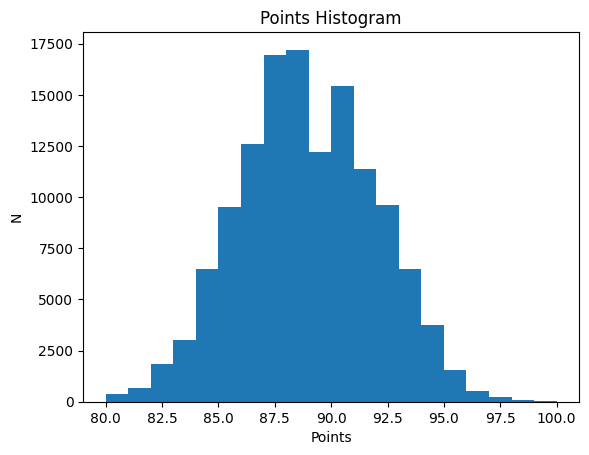

In [32]:
#plot histogram (columns, bins)
plt.hist(df.points, bins = 20)
#bins are the number of intervals ("20 bins --> 20 buckets you can fit the data into")
plt.title("Points Histogram")
plt.ylabel("N")
plt.xlabel("Points")
plt.show()

In [33]:
df

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris,Domaine Marcel Deiss


In [34]:
df["label"] = (df.points >= 90).astype(int) #creates new column named "label" in df that maps each value to 1 if points is greater than 90 or 0 if not (new column named label = binary classification of points)
df

,country,description,points,price,variety,winery,label
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia,0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos,0
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm,0
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian,0
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks,0
...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,90,28.0,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),1
129967,US,Citation is given as much as a decade of bottl...,90,75.0,Pinot Noir,Citation,1
129968,France,Well-drained gravel soil gives this wine its c...,90,30.0,Gewürztraminer,Domaine Gresser,1
129969,France,"A dry style of Pinot Gris, this is crisp with ...",90,32.0,Pinot Gris,Domaine Marcel Deiss,1


In [35]:
df = df[["description", "label"]] #creates new df with just labels selected
df


,description,label
0,"Aromas include tropical fruit, broom, brimston...",0
1,"This is ripe and fruity, a wine that is smooth...",0
2,"Tart and snappy, the flavors of lime flesh and...",0
3,"Pineapple rind, lemon pith and orange blossom ...",0
4,"Much like the regular bottling from 2012, this...",0
...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,1
129967,Citation is given as much as a decade of bottl...,1
129968,Well-drained gravel soil gives this wine its c...,1
129969,"A dry style of Pinot Gris, this is crisp with ...",1


In [36]:
#Tangential note
#df["description"]
df["description"] #-->outputs a series: one dimensional column

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

In [37]:
#Tangential note continued
df[["description"]] #--> dataframe with just "description selected"

,description
0,"Aromas include tropical fruit, broom, brimston..."
1,"This is ripe and fruity, a wine that is smooth..."
2,"Tart and snappy, the flavors of lime flesh and..."
3,"Pineapple rind, lemon pith and orange blossom ..."
4,"Much like the regular bottling from 2012, this..."
...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...
129967,Citation is given as much as a decade of bottl...
129968,Well-drained gravel soil gives this wine its c...
129969,"A dry style of Pinot Gris, this is crisp with ..."


In [38]:
df

,description,label
0,"Aromas include tropical fruit, broom, brimston...",0
1,"This is ripe and fruity, a wine that is smooth...",0
2,"Tart and snappy, the flavors of lime flesh and...",0
3,"Pineapple rind, lemon pith and orange blossom ...",0
4,"Much like the regular bottling from 2012, this...",0
...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,1
129967,Citation is given as much as a decade of bottl...,1
129968,Well-drained gravel soil gives this wine its c...,1
129969,"A dry style of Pinot Gris, this is crisp with ...",1


In [39]:
#different way to train model



train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

#df.sample(frac=1) --> returns df with randomized rows, frac=1 --> means randomize every row (good practice to shuffle data)
#splitting data into three sets train, val, test
#train --> gets 80 percent of data
#val --> gets 10 percent of data (note 0.9-0.8 equals percentage)
#test -->gets remaining 10 percent of data


In [40]:
len(train), len(val), len(test)

(103976, 12997, 12998)

In [41]:
len(train)/len(df), len(val)/len(df), len(test)/len(df)

(0.7999938447807587, 0.09999923059759484, 0.10000692462164637)

In [42]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
#Converts panda's dataframe into Tensorflow dataset, to train the model a different way
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  dataframe = dataframe.copy() #creates a copy of dataframe to not alter it
  labels = dataframe.pop('label') #labels = labels column of dataframe
  df = dataframe[['description']]

  #df = dataframe[["description"]] #new dataframe with only description column (only feature we care about), dataframe["description"] --> series of description (one dimensional column)
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  #dict(dataframe) --> creates a dictionary mapping each feature (column) with values (rows), *we popped label column so not included in dictionary
  #labels --> tuple of label values
  #tf.data.Dataset.from_tensor_slices(dict, tuple) --> creates Tensorflow dataset by combining dict of features with values and corresponding label
  #Tuple of dictionary and set pair are spliced together to create dataset
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe)) #shuffles dataset (to make sure model does not learn the order, and ensure randomness), batch together our data into buffers so we dont have to shuffle every element individually (saves compute)
  ds = ds.batch(batch_size) #returns ds that has been split into batches due to the batch_size (by prebatching the data we can make it easier to train the data since it does not have to train each individual item in dataset)
  ds = ds.prefetch(tf.data.AUTOTUNE) #prefetch dynamically adjusts your buffer size when training depending on current compute capabilities to optimize/speed up training (buffers variable data into data pipeline and prepares it to be trained), good practice


  return ds


Batch Size vs Buffer Size:
-Batch size is the number of samples that are grouped together when training a model
-Buffer size is the number of samples preloaded together in the data pipeline ready to be trained


In [43]:
#covert each pandas dataframe into tensorFlow dataset
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)


In [44]:
#train_data.cardinality() #cardinality is size of dataset
#Recap dataset --> 102 number of tensors of 1024 samples each, with each tensor consisting of typles of description and label mapped together


In [45]:
#len(train_data)

In [60]:
list(train_data)[0][0] #list of 102 tensors

{'description': <tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b"Beautiful, classic Green Valley Chardonnay, this shows bright, mouthwatering acidity and a steely minerality that make it savory and elegant. But there's also a deep, flavorful core of green apple butter, pineapple jam and orange-mango juice. Oak and lees aging lend a creamy, sourdough richness. Drink now.",
        b'Made with organically-farmed fruit, this Sicilian Grecanico opens with nice fullness, density and creamy aromas of lemon mousse and tangerine skin. The wine would make a perfect match to raw fish or sushi.',
        b'The extra year gives this wine quite different flavors from the forward fruitiness of Provence ros\xc3\xa9. It now has a richer, more complex character and weight of ripe fruit, caramel and vanilla flavors. This is a serious, food friendly ros\xc3\xa9.',
        ...,
        b'This is a pepper- and apple-flavored wine with refreshing acidity that cuts through its richness. Using grapes

In [47]:
#len(list(train_data)[0])
#102 tuples
#Each tuple has two tensors
#Both of shape (1024,) which is the batch size
#First tensor is descriptions
#Second tensor is labels


Size of train_data explained:


*   Dataframe is 129971 rows × 2 columns
*   Train data is 80% of our data (approximately)
*   Roughly about 104,448 data samples
*   Batching them into sets of 1,024 samples creates a dataset of 102 elements
*   In the dataset, each element is a tuple of size 2
*   Each tuple consists of two tensors, each with a shape of (1,024, 1)
*   The first tensor contains string descriptions
*   The second tensor contains integer label values

Sidenote:


*   When the batch size is not perfectly divisible by the data size, the remaining data can be handled in different ways
*   It can be thrown out, padded to fit the batch size, or recycled to the beginning if we were looping through our data for some models that continuously process data







Embedding + Model

In [63]:
#Tensorflow Hub --> repository of trained machine learning models that you can import and tune to your specifications
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
#hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)
#hub_layer(list(train_data)[0][0])

#Example
embed = hub.load("https://tfhub.dev/google/nnlm-en-dim50/2")
embeddings = embed(["cat is on the mat", "dog is in the fog"])


In [51]:
embeddings #Conver

<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[ 0.16589954,  0.0254965 ,  0.1574857 ,  0.17688066,  0.02911299,
        -0.03092718,  0.19445257, -0.05709129, -0.08631689, -0.04391516,
         0.13032274,  0.10905275, -0.08515751,  0.01056632, -0.17220995,
        -0.17925954,  0.19556305,  0.0802278 , -0.03247919, -0.49176937,
        -0.07767699, -0.03160921, -0.13952136,  0.05959712,  0.06858718,
         0.22386682, -0.16653948,  0.19412343, -0.05491862,  0.10997339,
        -0.15811177, -0.02576607, -0.07910853, -0.258499  , -0.04206644,
        -0.20052543,  0.1705603 , -0.15314153,  0.0039225 , -0.28694248,
         0.02468278,  0.11069503,  0.03733957,  0.01433943, -0.11048374,
         0.11931834, -0.11552787, -0.11110869,  0.02384969, -0.07074881],
       [ 0.1437864 ,  0.08291595,  0.10897306,  0.04464385, -0.03630389,
        -0.12605834,  0.20263346,  0.12862863, -0.07873426, -0.01195358,
         0.0020956 , -0.03080653, -0.08019945, -0.18797135, -0.11973457,
 

The model we are using is nnlm-en-dim50


*   It stands for neural network language model - english -dimension 50

*   It takes each sentence and generates a 50 dimension embedding vector
*   Text embedding is ascribing numerical values that the capture semantic meaning of the words

*   Similar words have similar embeddings

*   Model was trained on 7 billion engish words











In [49]:
model = tf.keras.Sequential()
hub.KerasLayer(embedding, dtype=tf.string, trainable=True) #Added hub_layer to model
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

https://youtu.be/VtRLrQ3Ev-U?feature=shared&t=5857